In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Python/data/train.csv')
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [5]:
df.drop(columns=["id","Policy_Sales_Channel"], inplace = True)

In [6]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,39,0
...,...,...,...,...,...,...,...,...,...,...
381104,Male,74,1,26.0,1,1-2 Year,No,30170.0,88,0
381105,Male,30,1,37.0,1,< 1 Year,No,40016.0,131,0
381106,Male,21,1,30.0,1,< 1 Year,No,35118.0,161,0
381107,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,74,0


In [7]:
df = pd.get_dummies(df, columns=["Gender"],drop_first=True)
df

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response,Gender_Male
0,44,1,28.0,0,> 2 Years,Yes,40454.0,217,1,True
1,76,1,3.0,0,1-2 Year,No,33536.0,183,0,True
2,47,1,28.0,0,> 2 Years,Yes,38294.0,27,1,True
3,21,1,11.0,1,< 1 Year,No,28619.0,203,0,True
4,29,1,41.0,1,< 1 Year,No,27496.0,39,0,False
...,...,...,...,...,...,...,...,...,...,...
381104,74,1,26.0,1,1-2 Year,No,30170.0,88,0,True
381105,30,1,37.0,1,< 1 Year,No,40016.0,131,0,True
381106,21,1,30.0,1,< 1 Year,No,35118.0,161,0,True
381107,68,1,14.0,0,> 2 Years,Yes,44617.0,74,0,False


In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[["Age", "Annual_Premium", "Vintage"]] = scaler.fit_transform(df[["Age", "Annual_Premium", "Vintage"]])

In [9]:
df

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Vintage,Response,Gender_Male
0,0.369231,1,28.0,0,> 2 Years,Yes,0.070366,0.716263,1,True
1,0.861538,1,3.0,0,1-2 Year,No,0.057496,0.598616,0,True
2,0.415385,1,28.0,0,> 2 Years,Yes,0.066347,0.058824,1,True
3,0.015385,1,11.0,1,< 1 Year,No,0.048348,0.667820,0,True
4,0.138462,1,41.0,1,< 1 Year,No,0.046259,0.100346,0,False
...,...,...,...,...,...,...,...,...,...,...
381104,0.830769,1,26.0,1,1-2 Year,No,0.051234,0.269896,0,True
381105,0.153846,1,37.0,1,< 1 Year,No,0.069551,0.418685,0,True
381106,0.015385,1,30.0,1,< 1 Year,No,0.060439,0.522491,0,True
381107,0.738462,1,14.0,0,> 2 Years,Yes,0.078110,0.221453,0,False


In [10]:
df = pd.get_dummies(df, columns=["Vehicle_Age"],drop_first=True)
df = pd.get_dummies(df, columns=["Vehicle_Damage"],drop_first=True)


In [11]:
df["Region_Code"] = df["Region_Code"].apply(lambda x: 1 if x==28 else 0)


In [12]:
df["Region_Code"].value_counts()


Region_Code
0    274694
1    106415
Name: count, dtype: int64

In [13]:
df

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
0,0.369231,1,1,0,0.070366,0.716263,1,True,False,True,True
1,0.861538,1,0,0,0.057496,0.598616,0,True,False,False,False
2,0.415385,1,1,0,0.066347,0.058824,1,True,False,True,True
3,0.015385,1,0,1,0.048348,0.667820,0,True,True,False,False
4,0.138462,1,0,1,0.046259,0.100346,0,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
381104,0.830769,1,0,1,0.051234,0.269896,0,True,False,False,False
381105,0.153846,1,0,1,0.069551,0.418685,0,True,True,False,False
381106,0.015385,1,0,1,0.060439,0.522491,0,True,True,False,False
381107,0.738462,1,0,0,0.078110,0.221453,0,False,False,True,True


In [14]:
df.corr()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Vintage,Response,Gender_Male,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years,Vehicle_Damage_Yes
Age,1.000000,-0.079782,0.298304,-0.254682,0.067507,-0.001264,0.111147,0.145545,-0.787775,0.220694,0.267534
Driving_License,-0.079782,1.000000,-0.016017,0.014969,-0.011906,-0.000848,0.010155,-0.018374,0.040215,-0.006211,-0.016622
Region_Code,0.298304,-0.016017,1.000000,-0.182873,0.293050,0.000369,0.122609,0.029822,-0.325856,0.147437,0.193135
Previously_Insured,-0.254682,0.014969,-0.182873,1.000000,0.004269,0.002537,-0.341170,-0.081932,0.358773,-0.191352,-0.824143
Annual_Premium,0.067507,-0.011906,0.293050,0.004269,1.000000,-0.000608,0.022575,0.003673,-0.022555,0.061918,0.009349
Vintage,-0.001264,-0.000848,0.000369,0.002537,-0.000608,1.000000,-0.001050,-0.002517,0.002410,0.000600,-0.002064
Response,0.111147,0.010155,0.122609,-0.341170,0.022575,-0.001050,1.000000,0.052440,-0.209878,0.109300,0.354400
Gender_Male,0.145545,-0.018374,0.029822,-0.081932,0.003673,-0.002517,0.052440,1.000000,-0.166280,0.043155,0.091606
Vehicle_Age_< 1 Year,-0.787775,0.040215,-0.325856,0.358773,-0.022555,0.002410,-0.209878,-0.166280,1.000000,-0.182750,-0.370778
Vehicle_Age_> 2 Years,0.220694,-0.006211,0.147437,-0.191352,0.061918,0.000600,0.109300,0.043155,-0.182750,1.000000,0.206961


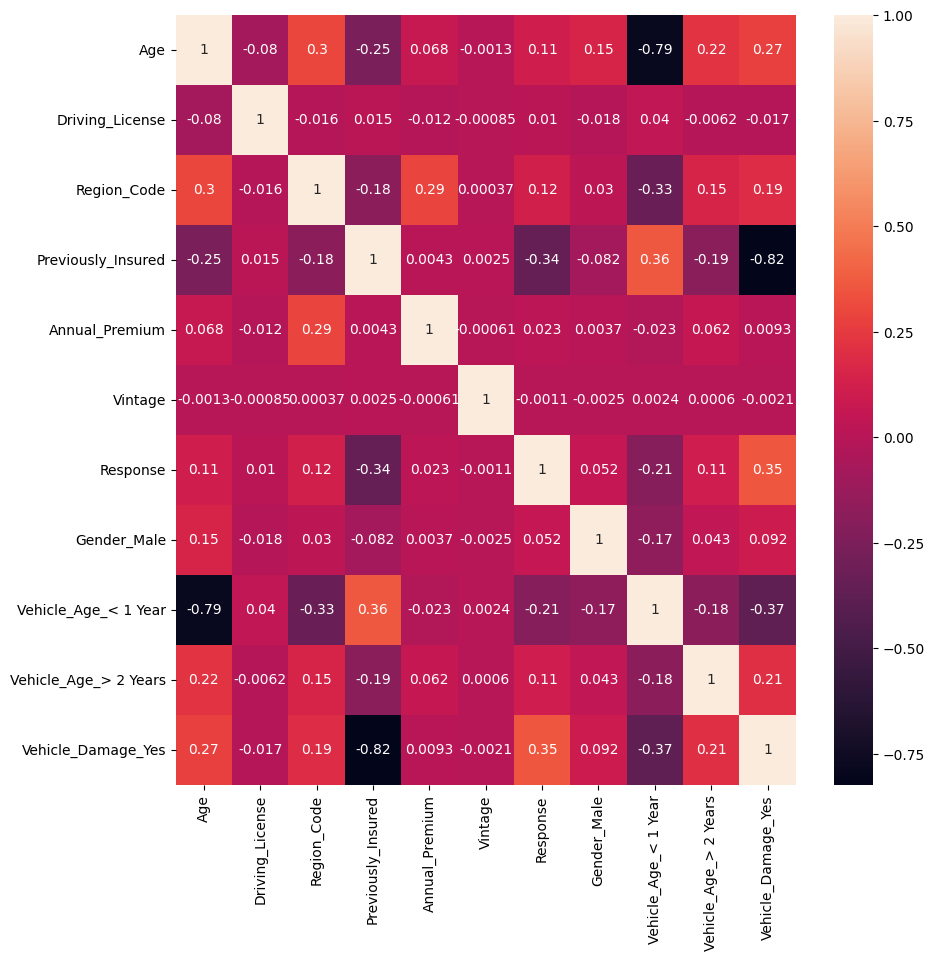

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
dataplot = sns.heatmap(df.corr(), annot=True, ax = ax)

In [16]:
X = df.drop(columns=["Response"])
y = df["Response"]
X.shape, y.shape

((381109, 10), (381109,))

In [17]:
# Split train test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
X_train.shape, y_train.shape

((304887, 10), (304887,))

##Oversampling

In [18]:
# Oversampling use SMOTE
# !pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

sm = SMOTE()

X_train_os, y_train_os = sm.fit_resample(X_train, y_train)

X_train_os.shape, y_train_os.shape

((535400, 10), (535400,))

##Logistic Regression with data os and not os

In [19]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       1.00      0.00      0.00      9523

    accuracy                           0.88     76222
   macro avg       0.94      0.50      0.47     76222
weighted avg       0.89      0.88      0.82     76222

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       1.00      0.00      0.00      9523

    accuracy                           0.88     76222
   macro avg       0.94      0.50      0.47     76222
weighted avg       0.89      0.88      0.82     76222



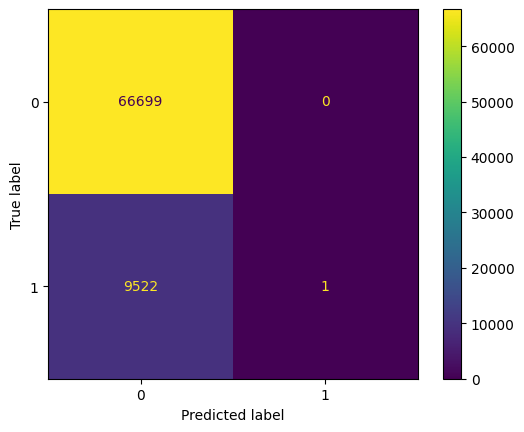

In [21]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression()
model_log.fit(X_train, y_train)

y_pred = model_log.predict(X_test)

print(classification_report( y_test, y_pred))
print(classification_report( y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=model_log.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_log.classes_)
disp.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66699
           1       0.26      0.97      0.40      9523

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222

              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66699
           1       0.26      0.97      0.40      9523

    accuracy                           0.64     76222
   macro avg       0.62      0.78      0.57     76222
weighted avg       0.90      0.64      0.70     76222



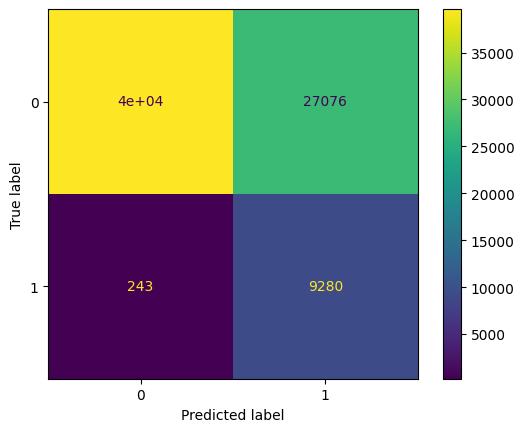

In [23]:
model_log = LogisticRegression()
model_log.fit(X_train_os, y_train_os)

y_pred = model_log.predict(X_test)

print(classification_report( y_test, y_pred))
print(classification_report( y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=model_log.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_log.classes_)
disp.plot()
plt.show()

## XGB(os/no os)

In [25]:
X_train = X_train.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Less_1Year", "Vehicle_Age_> 2 Years": "Vehicle_More_2Year" }, errors="raise")
X_test = X_test.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Less_1Year", "Vehicle_Age_> 2 Years": "Vehicle_More_2Year" }, errors="raise")
X_train_os = X_train_os.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Less_1Year", "Vehicle_Age_> 2 Years": "Vehicle_More_2Year" }, errors="raise")

### GridSearch find hyparameter

In [38]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
# Convert data to DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)

# Define parameter grid
param_grid = {
    'max_depth': [2, 10, 200],
    'learning_rate': [0.1, 0.01, 1],
    'n_estimators': [60, 220, 1],
}

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

# Grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train_os, y_train_os)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 200, 'n_estimators': 220}
Best Score: 0.8584478973220498


              precision    recall  f1-score   support

           0       0.92      0.83      0.87     66699
           1       0.29      0.47      0.36      9523

    accuracy                           0.79     76222
   macro avg       0.60      0.65      0.62     76222
weighted avg       0.84      0.79      0.81     76222



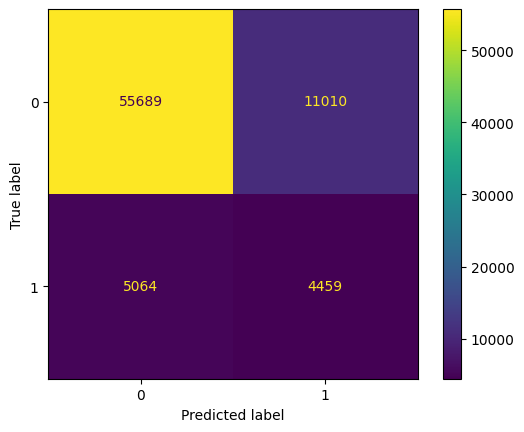

In [40]:
from xgboost import XGBClassifier
# create model instance
model_xgb = XGBClassifier(n_estimators=220, max_depth=200, learning_rate=0.1, objective='binary:logistic', eval_metric='logloss')
# fit model
model_xgb.fit(X_train_os, y_train_os)
# make predictions
y_pred = model_xgb.predict(X_test)
print(classification_report( y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=model_log.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_log.classes_)
disp.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.79      0.00      0.00      9523

    accuracy                           0.88     76222
   macro avg       0.83      0.50      0.47     76222
weighted avg       0.86      0.88      0.82     76222



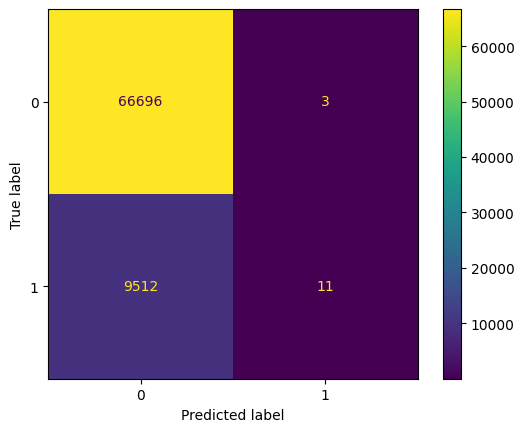

In [41]:
# create model instance
model_xgb = XGBClassifier(n_estimators=220, max_depth=10, learning_rate=0.01, objective='binary:logistic')
# fit model
model_xgb.fit(X_train, y_train)
# make predictions
y_pred = model_xgb.predict(X_test)
print(classification_report( y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=model_log.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_log.classes_)
disp.plot()
plt.show()

0.79373


<ipython-input-35-0032ea0593ef>:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1],'r--', color="navy")


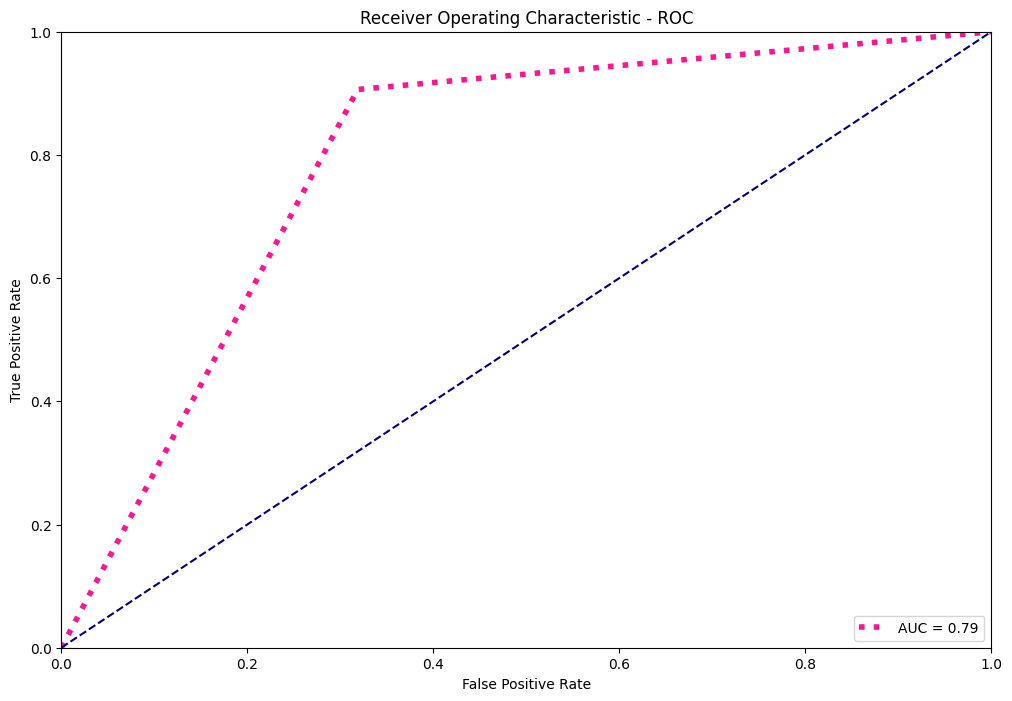

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import cross_val_predict

fpr_log_ros, tpr_log_ros, thresholds_log_ros = roc_curve(y_test, y_pred)

auc_log_ros = float("{:.5f}".format(auc(fpr_log_ros, tpr_log_ros)))
print(auc_log_ros)

plt.figure(figsize=(12, 8))
plt.title('Receiver Operating Characteristic - ROC')
plt.plot(fpr_log_ros, tpr_log_ros, ':', linewidth=4, label = 'AUC = %0.2f' % auc_log_ros, color="deeppink", )
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', color="navy")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()